In [1]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns

sns.set_theme(style="ticks", palette="pastel", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
# sns.set_context("paper")

DATAPATH = pathlib.PosixPath("~/Dev/datasets/ttbacc/ttbacc-vowels-acoustics.csv").expanduser()

In [2]:
data = pd.read_csv(DATAPATH)
noage = data.drop("age", axis=1)
nanidx = noage.isna().any(axis=1)
dataclean = data[nanidx == False]
data_m = dataclean[dataclean["gender"] == "M"]
data_f = dataclean[dataclean["gender"] == "F"]
dataclean

meanf0  length     meanDB          f1           f2 phoneme state  \
6         97.478418      30 -53.380024  195.238897   694.675895       a    SP   
7        303.767895     100 -43.314560  327.975931   892.200514      ũ    SP   
9        205.643488     120 -58.289671  427.110414   697.001201       e    BA   
10        89.955585      30 -54.064806  178.832347   686.949308       i    MG   
12       174.343024      30 -52.337336  140.284780   522.132628       i    SP   
...             ...     ...        ...         ...          ...     ...   ...   
1342094  158.218665      40 -49.941588  309.109102   652.951399      ũ    MG   
1342096  157.743501      30 -45.771279  398.786614   885.246259       ɔ    MG   
1342097  135.948424      40 -50.488637  355.065379  1784.892522       i    MG   
1342098  108.500734     140 -46.299555  170.794860   713.780174       a    MG   
1342099   95.939340      30 -40.773989  178.120599   746.045967       u    MG   

        gender   age          speaker caption  
6            M   NaN     gustavo assi    a.pt  
7            F  30.0        nega cléo    a.pt  
9            F   NaN  mila d'oliveira   pt-BR  
10           F  26.0   aretha soyombo    a.pt  
12           M   NaN     gustavo assi    a.pt  
...        ...   ...              ...     ...  
1342094      M   NaN  marcos calazans    a.pt  
1342096      M   NaN  marcos calazans    a.pt  
1342097      M   NaN  marcos calazans    a.pt  
1342098      M   NaN  marcos calazans    a.pt  
1342099      M   NaN  marcos calazans    a.pt  

[1215659 rows x 11 columns]

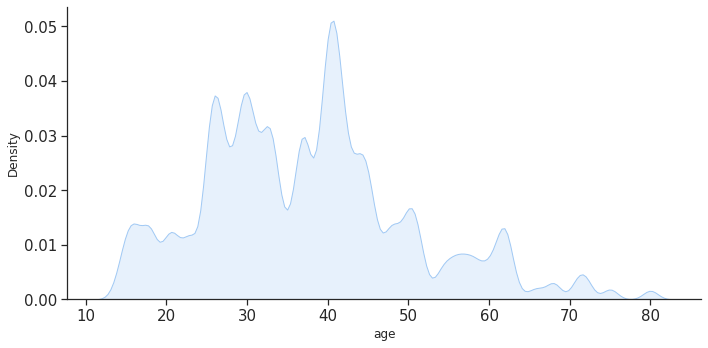

In [3]:
sns.set_theme(style="ticks", palette="pastel", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
sns.displot(
    data=dataclean,
    x="age",
    kind="kde",
    aspect=2,
    fill=True,
)

In [4]:
youngs = dataclean[(dataclean.age < 36) & (dataclean.age > 19)]
youngs

meanf0  length     meanDB          f1           f2 phoneme state  \
7        303.767895     100 -43.314560  327.975931   892.200514      ũ    SP   
10        89.955585      30 -54.064806  178.832347   686.949308       i    MG   
15       122.628041      30 -44.077406  453.786957  1631.033746       ɐ    RJ   
18       117.717293      30 -46.865321  314.394072  1824.876932       u    RJ   
20       305.519903     180 -45.357460  521.322474  1195.989717       a    SP   
...             ...     ...        ...         ...          ...     ...   ...   
1327709  131.800235     270 -44.179096  733.457012  1408.216808       a    MG   
1327710  136.328998      30 -42.213963  282.564774   811.455456      ũ    MG   
1327712  129.870481      40 -46.356250  387.379307  1258.348490       ɔ    MG   
1327713  137.852971      50 -44.346082  360.796421  2001.160614       i    MG   
1327714  121.024742     150 -34.530801  652.820231  1598.451889       a    MG   

        gender   age         speaker caption  
7            F  30.0       nega cléo    a.pt  
10           F  26.0  aretha soyombo    a.pt  
15           M  28.0      rene silva   pt-BR  
18           M  28.0      rene silva   pt-BR  
20           F  30.0       nega cléo    a.pt  
...        ...   ...             ...     ...  
1327709      M  25.0     felipe arco    a.pt  
1327710      M  25.0     felipe arco    a.pt  
1327712      M  25.0     felipe arco    a.pt  
1327713      M  25.0     felipe arco    a.pt  
1327714      M  25.0     felipe arco    a.pt  

[210749 rows x 11 columns]

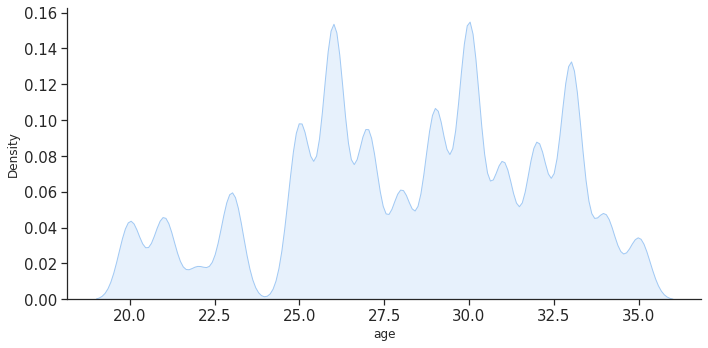

In [5]:
sns.set_theme(style="ticks", palette="pastel", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
sns.displot(
    data=youngs,
    x="age",
    kind="kde",
    aspect=2,
    fill=True,
)

In [6]:
phonecounts = pd.DataFrame()
phonecounts["phoneme"] = youngs["phoneme"].unique()
phonecounts["freq"] = youngs["phoneme"].value_counts().values
phonecounts
youngs["phoneme"].value_counts()

ɐ     42604
u     33850
i     30822
a     23980
e     16786
o     12660
ẽ    11265
ɐ̃    10938
ɛ      8841
ɔ      6386
õ     4488
ũ     4181
ĩ     3948
Name: phoneme, dtype: int64

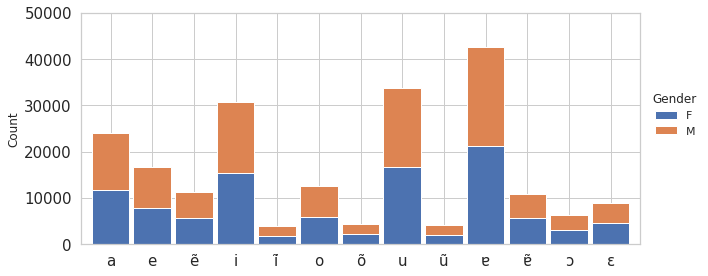

In [7]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
youngs_counts = youngs.groupby(["phoneme", "gender"]).size().reset_index().pivot(columns="gender", index="phoneme", values=0)
youngs_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 4),
    xlabel="",
    ylabel="Count",
    rot=0,
    ylim=(0, 50000),
    width=0.9
)
plt.legend(title="Gender", bbox_to_anchor=(1.12, .7), frameon=False)
plt.tight_layout()
plt.savefig("../imgs/phone-count.pdf", dpi=300, transparent=True)

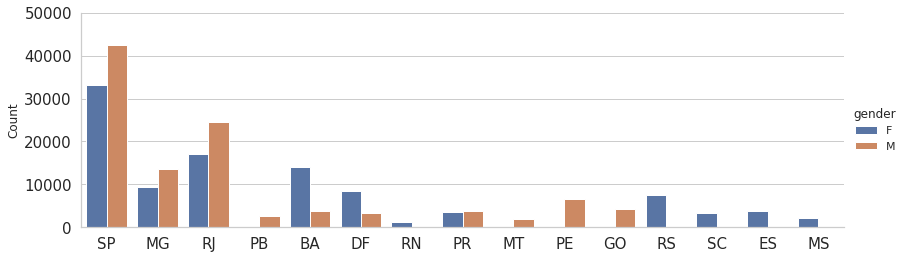

In [8]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
fct = sns.catplot(
    data=youngs,
    x="state",
    hue="gender",
    aspect=3,
    height=4,
    kind="count",
    facet_kws={"ylim": (0, 50000)},
)
fct.set_axis_labels("", "Count")
plt.savefig("../imgs/phone-count-state.pdf", dpi=300, transparent=True)

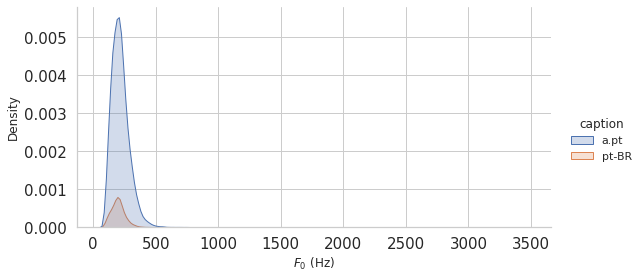

In [9]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
fct = sns.displot(
    data=youngs,
    hue="caption",
    x="meanf0",
    # bw_adjust=2,
    fill=True,
    kind="kde",
    aspect=2,
    height=4,
    # facet_kws={"ylim": (0, 0.010)},
)
fct.set_axis_labels("$F_0$ (Hz)", "Density")
plt.savefig("../imgs/f0-dis.pdf", dpi=300)

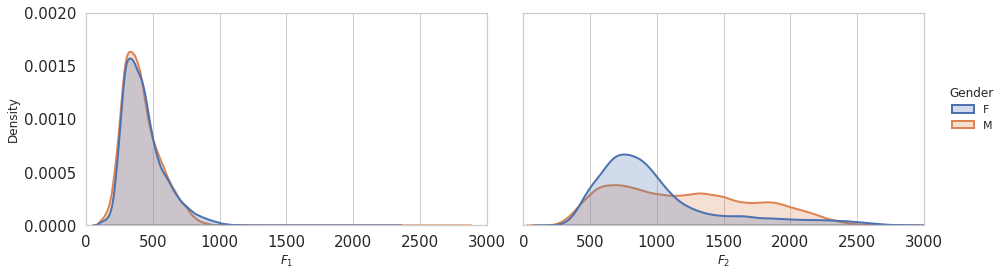

In [10]:
fig, axs = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)
axs[0].set_ylim((0, 0.002))
axs[0].set_xlim((0, 3000))
axs[0].grid(axis="y")
axs[0].set_xlabel("$F_1$")

axs[1].grid(axis="y")
axs[1].set_xlim((0, 3000))
axs[1].set_ylim((0, 0.002))
axs[1].set_xlabel("$F_2$")

sns.kdeplot(
    data=youngs,
    x="f1",
    hue="gender",
    fill=True,
    ax=axs[0],
    legend=False,
    lw=2,
)
sns.kdeplot(
    data=youngs,
    x="f2",
    hue="gender",
    fill=True,
    ax=axs[1],
    lw=2,
)

leg = axs[1].get_legend()
leg.set(title="Gender", bbox_to_anchor=(1.2, .7))
leg.draw_frame(False)
fig.tight_layout()
plt.savefig("../imgs/formants-gender.pdf", dpi=300)

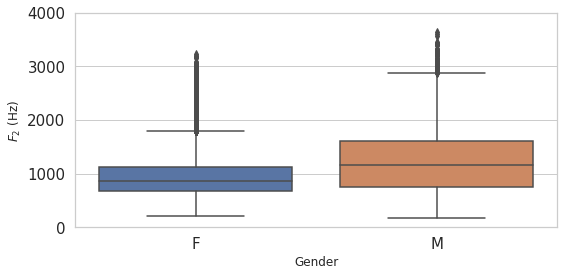

In [11]:
ax = sns.boxplot(
    data=youngs,
    x="gender",
    y="f2",
)
ax.set_ylim((0, 4000))
ax.set_ylabel("$F_2$ (Hz)")
ax.set_xlabel("Gender")
plt.tight_layout()
plt.savefig("../imgs/f2-box.pdf", dpi=300)

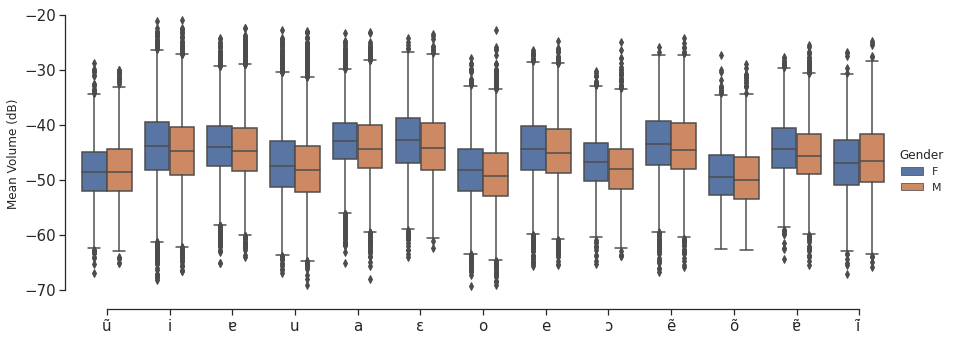

In [12]:
sns.set_theme(style="ticks", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
g = sns.catplot(
    data=youngs,
    x="phoneme",
    y="meanDB",
    kind="box",
    aspect=2.5,
    hue="gender",
)
g.set_axis_labels("", "Mean Volume (dB)")
g.legend.set(title="Gender")
g.despine(trim=True, offset=10)
plt.savefig("../imgs/vowels-db.pdf", dpi=300)

In [13]:
print(f"{len(youngs[(youngs.phoneme == 'u')].index)} samples for /u/")
print(f"{len(youngs[(youngs.phoneme == 'u') & (youngs.meanDB > -34)].index)} hiher than -34 dB")
print(f"{len(youngs[(youngs.phoneme == 'u') & (youngs.meanDB < -63)].index)} lower than -63 dB")

33850 samples for /u/
730 hiher than -34 dB
79 lower than -63 dB


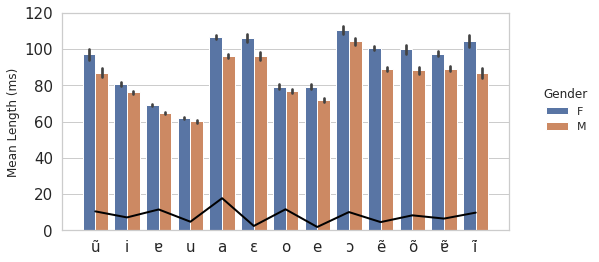

In [14]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})

fig, axis = plt.subplots(figsize=(8, 4))

facet = sns.barplot(
    data=youngs, 
    y="length",
    x="phoneme",
    hue="gender",
    ax=axis,
)

youngs_M_means = youngs[youngs["gender"] == "M"].groupby(["phoneme"]).mean()
youngs_F_means = youngs[youngs["gender"] == "F"].groupby(["phoneme"]).mean()
youngs_dff = youngs_F_means - youngs_M_means

sns.lineplot(
    data=youngs_dff,
    x="phoneme",
    y="length",
    color="black",
    ax=axis,
    markers=True,
    lw=2,
)

plt.ylabel("Mean Length (ms)")
plt.ylim((0, 120))
plt.xlabel("")
plt.legend(title="Gender", bbox_to_anchor=(1.2, .7), frameon=False)
plt.savefig("../imgs/vowels-len.pdf", dpi=300)

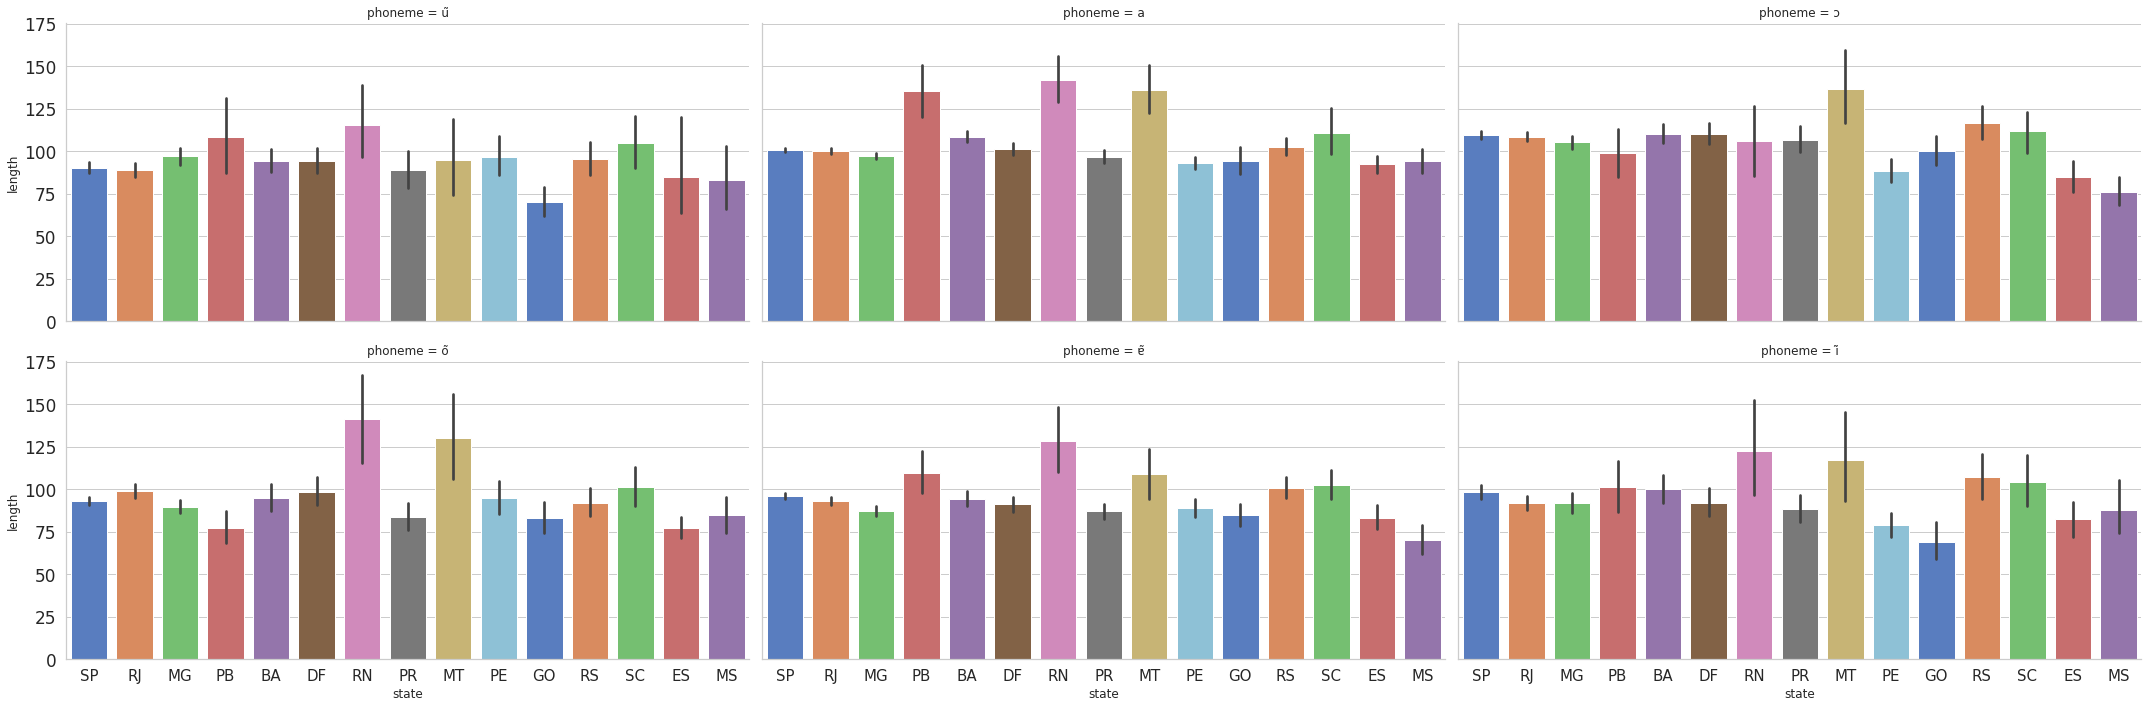

In [15]:
sns.set_theme(style="whitegrid", palette="muted", rc={"ytick.labelsize": 17, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
diff_phone = ["a", "ɐ̃", "ɔ", "õ", "ũ", "ĩ"]

sns.catplot(
    data=youngs[youngs["phoneme"].isin(diff_phone)],
    col="phoneme",
    col_wrap=3,
    x="state",
    y="length",
    kind="bar",
    aspect=2,
    palette="muted",
)
plt.savefig("../imgs/vowels-len-state.pdf", dpi=300)

In [16]:
youngs_dff

meanf0     length    meanDB         f1          f2       age
phoneme                                                                 
a        68.976853  10.448285  0.769867 -24.182075 -110.893764  1.699883
e        71.589534   7.113104  0.595432  46.326585 -366.700955  1.689354
ẽ       69.683268  11.505258  0.516349   7.190398 -372.633783  1.987345
i        61.696265   4.734597  0.737443  23.139250 -444.149699  1.597212
ĩ       78.270923  17.703347 -0.924421  20.986267 -302.347374  1.513271
o        74.796128   2.404352  0.770137  49.573296  -48.996164  1.659089
õ       78.452742  11.600084  0.412456  28.759697   27.329962  1.750248
u        74.408966   1.834955  0.842982  31.095047  -97.543415  1.632386
ũ       80.926318  10.062365 -0.246150  31.215263   40.298723  1.771847
ɐ        75.142928   4.530168  0.554842  -0.691771 -214.247204  1.555118
ɐ̃       77.613763   8.257820  0.896895  14.310569 -109.357464  1.624837
ɔ        70.111028   6.461531  1.070842  20.399287  -47.846407  1.718408
ɛ        69.253482   9.755340  0.978244  19.010111 -328.534508  1.526654

In [17]:
youngs_dff["length"] / youngs_M_means["length"]

phoneme
a     0.108611
e     0.098646
ẽ    0.129246
i     0.062229
ĩ    0.204041
o     0.031253
õ    0.131513
u     0.030550
ũ    0.115599
ɐ     0.070151
ɐ̃    0.092529
ɔ     0.061955
ɛ     0.101197
Name: length, dtype: float64

In [18]:
womenfs = youngs[youngs["gender"] == "F"].groupby("phoneme")[["f1", "f2"]].mean()
menfs = youngs[youngs["gender"] == "M"].groupby("phoneme")[["f1", "f2"]].mean()

In [19]:
womenfs

f1           f2
phoneme                         
a        573.753129  1070.055690
e        424.120369  1088.345266
ẽ       364.911399   953.593369
i        331.932175  1093.423854
ĩ       319.380378   840.433489
o        438.398480   861.254726
õ       398.477664   830.769406
u        372.810007   922.525265
ũ       349.165018   844.249125
ɐ        468.516050   988.637092
ɐ̃       429.814424   960.442575
ɔ        511.922220   918.942454
ɛ        498.469320  1052.422503

In [20]:
menfs

f1           f2
phoneme                         
a        597.935204  1180.949453
e        377.793784  1455.046222
ẽ       357.721001  1326.227152
i        308.792925  1537.573554
ĩ       298.394111  1142.780864
o        388.825184   910.250890
õ       369.717967   803.439444
u        341.714959  1020.068680
ũ       317.949755   803.950402
ɐ        469.207822  1202.884296
ɐ̃       415.503855  1069.800039
ɔ        491.522933   966.788860
ɛ        479.459209  1380.957012

In [21]:
means = youngs.groupby(["gender", "phoneme"]).mean()
means.loc[("M")]

meanf0      length     meanDB          f1           f2        age
phoneme                                                                       
a        171.231919   96.198960 -43.769828  597.935204  1180.949453  27.473881
e        186.851489   72.107171 -44.861311  377.793784  1455.046222  27.518690
ẽ       180.404605   89.018594 -43.962323  357.721001  1326.227152  27.445015
i        195.057509   76.083484 -44.661777  308.792925  1537.573554  27.531628
ĩ       178.791348   86.763848 -46.032163  298.394111  1142.780864  27.619534
o        181.767624   76.932569 -48.982834  388.825184   910.250890  27.554135
õ       178.860864   88.204861 -49.433707  369.717967   803.439444  27.362847
u        185.524837   60.064824 -47.843284  341.714959  1020.068680  27.503309
ũ       183.358276   87.045714 -48.133442  317.949755   803.950402  27.396044
ɐ        175.074486   64.577088 -44.417363  469.207822  1202.884296  27.600536
ɐ̃       180.976803   89.245365 -45.109828  415.503855  1069.800039  27.457435
ɔ        172.041988  104.293362 -47.787152  491.522933   966.788860  27.495258
ɛ        175.467215   96.399630 -43.969713  479.459209  1380.957012  27.560130

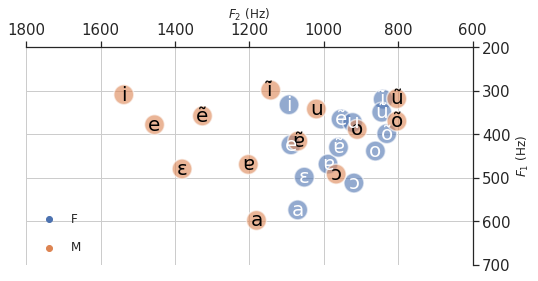

In [22]:
sns.set_theme(style="ticks", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
ax = sns.scatterplot(
    data=means,
    x="f2",
    y="f1",
    hue="gender",
    s=400,
    alpha=.6,
    cmap="viridis",
)
for _, f in means.loc[("M")][["f1", "f2"]].iterrows():
    plt.text(f.f2, f.f1, f.name, va="center", ha="center", fontdict={"fontsize": 20, "color": "black"})
for _, f in means.loc[("F")][["f1", "f2"]].iterrows():
    plt.text(f.f2, f.f1, f.name, va="center", ha="center", fontdict={"fontsize": 20, "color": "white"})
ax.invert_xaxis()
ax.invert_yaxis()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
ax.xaxis.tick_top()
ax.xaxis.set_label_position("top")
ax.spines.left.set_visible(False)
ax.spines.bottom.set_visible(False)
plt.xlim(1800, 600)
plt.ylim(700, 200)
plt.ylabel("$F_1$ (Hz)")
plt.xlabel("$F_2$ (Hz)")
plt.legend(title="", frameon=False, labelspacing=1.3, loc="lower left", fontsize=12)
plt.grid()

In [23]:
means_cap = youngs.groupby(["caption", "phoneme"]).mean()
means_cap.loc[("pt-BR")]

meanf0      length     meanDB          f1           f2        age
phoneme                                                                       
a        190.750877   98.931799 -43.105672  575.337653  1163.960491  29.092050
e        203.721560   76.721661 -44.095676  391.312327  1389.223691  29.302469
ẽ       197.984418   94.240129 -44.717238  358.155447  1200.601844  29.078163
i        210.831399   78.494828 -44.847842  312.248454  1356.104323  29.097126
ĩ       208.856634   96.698765 -46.781053  304.036815   950.668932  28.955556
o        200.654517   76.871332 -48.464756  403.830330   866.376016  29.142212
õ       203.873096   91.715054 -49.966337  363.131422   757.836758  28.938172
u        209.203655   59.456406 -48.368293  346.037497   934.602052  29.253559
ũ       205.557213   85.091837 -49.274586  318.030434   744.917177  28.938776
ɐ        198.131745   66.539514 -43.972968  469.678405  1144.097436  29.242038
ɐ̃       203.621668   97.518006 -44.763154  424.157818   999.619530  28.720222
ɔ        189.505213  103.593482 -47.068045  475.960886   941.334712  29.200686
ɛ        191.210180   96.718750 -42.454383  482.547752  1308.393390  28.702500

In [24]:
def vowel_scatter(axes, means_df, label, c):
    axes.scatter(
        x=means_df["f2"],
        y=means_df["f1"],
        s=400,
        alpha=.6,
        label=label,
        edgecolors="#FFFFFF",
    )
    for _, f in means_df[["f1", "f2"]].iterrows():
        plt.text(f.f2, f.f1, f.name, va="center", ha="center", fontdict={"fontsize": 20, "color": c})
        

def configure_plot(axes):
    axes.invert_xaxis()
    axes.invert_yaxis()
    axes.yaxis.tick_right()
    axes.yaxis.set_label_position("right")
    axes.xaxis.tick_top()
    axes.xaxis.set_label_position("top")
    axes.spines.left.set_visible(False)
    axes.spines.bottom.set_visible(False)
    plt.xlim(1800, 600)
    plt.ylim(700, 200)
    plt.ylabel("$F_1$ (Hz)")
    plt.xlabel("$F_2$ (Hz)")
    plt.legend(title="", frameon=False, labelspacing=1.3, loc="lower left", fontsize=12)
    plt.grid()
    plt.tight_layout()

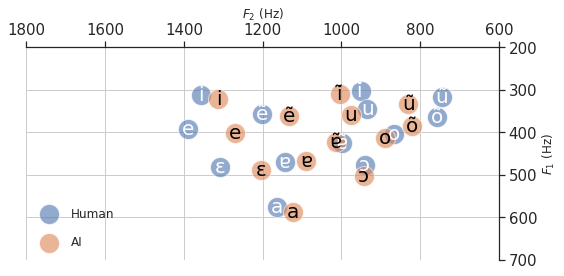

In [25]:
sns.set_theme(style="ticks", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
human_vowels = means_cap.loc[("pt-BR")]
ai_vowels = means_cap.loc[("a.pt")]
fig, ax = plt.subplots()
vowel_scatter(ax, human_vowels, label="Human", c="white")
vowel_scatter(ax, ai_vowels, label="AI", c="black")
configure_plot(ax)
plt.savefig("../imgs/vowels-hptxai.pdf", dpi=300)

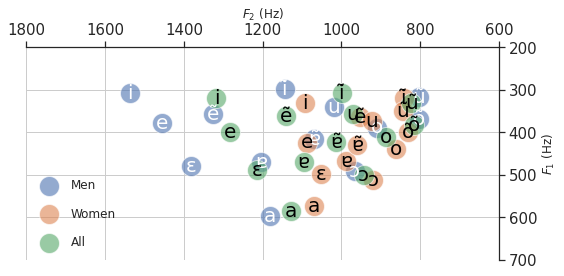

In [26]:
fig, ax = plt.subplots()
vowel_scatter(ax, menfs, label="Men", c="white")
vowel_scatter(ax, womenfs, label="Women", c="black")
vowel_scatter(ax, youngs.groupby("phoneme")[["f1", "f2"]].mean(), label="All", c="black")
configure_plot(ax)
plt.savefig("../imgs/vowels-menxwomen.pdf", dpi=300)

In [27]:
nordestino_states = ["AL", "PE", "PB", "RN", "CE"]
nordestino = youngs[youngs["state"].isin(nordestino_states)]
nordestino_vowels = nordestino.groupby("phoneme")[["f1", "f2"]].mean()
nrddata = nordestino.replace(["AL", "PE", "PB", "RN", "CE"], "NRD")

In [28]:
nrddata.speaker.value_counts()

renan hannouche     3376
jefferson moisés    3132
julian santos       2518
ellen monielle      1142
Name: speaker, dtype: int64

In [29]:
paulistano = youngs[youngs["state"] == "SP"]
paulistano_vowels = youngs.groupby("phoneme")[["f1", "f2"]].mean()
paulistano

meanf0  length     meanDB           f1           f2 phoneme  \
7        303.767895     100 -43.314560   327.975931   892.200514      ũ   
20       305.519903     180 -45.357460   521.322474  1195.989717       a   
29       343.805983     170 -51.321919   359.246510   999.924057       u   
33       256.590698      50 -47.092871   323.305142   949.427817       u   
42       198.461324     130 -54.269686   335.890043   605.736023       o   
...             ...     ...        ...          ...          ...     ...   
1165014  157.001753      30 -50.884177   459.662746  1102.030189       ɔ   
1165015  135.477984      40 -51.814481   402.517464  1966.852559       i   
1165017  108.083416      60 -45.340097   714.778323  1606.352038       a   
1165021   90.961959      30 -41.900481   229.895845  1704.476528       ɐ   
1165026   80.554350      30 -56.967949  1849.027080  2294.813700       i   

        state gender   age                     speaker caption  
7          SP      F  30.0                   nega cléo    a.pt  
20         SP      F  30.0                   nega cléo    a.pt  
29         SP      F  30.0                   nega cléo    a.pt  
33         SP      F  30.0                   nega cléo    a.pt  
42         SP      F  30.0                   nega cléo    a.pt  
...       ...    ...   ...                         ...     ...  
1165014    SP      M  20.0  joao marcos vicente branco    a.pt  
1165015    SP      M  20.0  joao marcos vicente branco    a.pt  
1165017    SP      M  20.0  joao marcos vicente branco    a.pt  
1165021    SP      M  20.0  joao marcos vicente branco    a.pt  
1165026    SP      M  20.0  joao marcos vicente branco    a.pt  

[75638 rows x 11 columns]

In [80]:
spk_gend = paulistano.groupby(["speaker", "gender"]).median()

In [87]:
len(spk_gend.loc[(slice(None), "M"), :].index)

16

In [88]:
spk_gend

meanf0  length     meanDB          f1  \
speaker                    gender                                              
amanda costa               F       310.105658    70.0 -40.149148  483.067331   
amanda oliveira            F       267.245446    80.0 -48.198620  349.874008   
carima orra                F       230.614389    70.0 -48.059850  420.116639   
carlos stênio              M       170.037111    60.0 -50.987150  366.073323   
cesar cielo                M       169.177972    50.0 -49.259934  439.016408   
edson castro               M       191.576727    50.0 -50.634077  351.410962   
ester carro                F       230.488864    70.0 -46.069262  429.206787   
fernanda abra              F       282.798513    80.0 -43.492987  475.815613   
fernanda souza             F       310.034020    70.0 -46.038573  397.220864   
gabriela augusto           M       142.040447    60.0 -49.125159  388.224625   
jessica campos             F       267.910809    60.0 -45.253202  401.996377   
joao branco                M       194.305854    70.0 -45.921041  308.508726   
joao marcos vicente branco M       191.552536    60.0 -48.691409  352.658128   
konrad dantas              M       195.724191    60.0 -39.057532  430.812294   
lela brandão               F       222.640889    60.0 -51.541100  335.294035   
lucas paredes              M       176.357336    50.0 -49.217107  378.299668   
luiza brasil               F       221.658104    70.0 -44.710520  384.228753   
marcela ceribelli          F       191.206991    60.0 -47.963592  400.584263   
marcelo rocha              M       195.780090    69.5 -48.042963  437.030815   
mari palma                 F       229.205830    70.0 -43.719438  327.695317   
marina helou               F       230.588927    60.0 -45.969328  389.152394   
mc kekel                   M       135.125353    70.0 -44.035038  384.021768   
murilo duarte              M       191.941912    60.0 -40.857494  430.033647   
nega cléo                  F       250.576831    70.0 -44.323184  420.973141   
ricardo geromel            M       135.137816    70.0 -45.727385  452.168571   
roger cipó                 M       149.958315    70.0 -47.570420  377.066662   
taciana fortunati          F       192.351837    70.0 -46.113830  333.030753   
taynara alves              F       245.793720    80.0 -41.485808  384.043556   
thays pretti               F       270.601585    80.0 -43.694370  488.793239   
thiago torres              M       157.935027    60.0 -46.249649  351.684723   
vitor santos               M       113.583203    60.0 -50.475569  355.673740   
yves carbinatti            M       113.059429    60.0 -49.247585  367.594500   

                                            f2   age  
speaker                    gender                     
amanda costa               F       1193.250853  25.0  
amanda oliveira            F        750.308574  31.0  
carima orra                F        839.580728  27.0  
carlos stênio              M        667.763136  25.0  
cesar cielo                M       1096.965429  33.0  
edson castro               M        681.998324  34.0  
ester carro                F        775.638272  26.0  
fernanda abra              F        974.940963  34.0  
fernanda souza             F        761.806216  26.0  
gabriela augusto           M        783.713433  28.0  
jessica campos             F        836.246774  21.0  
joao branco                M        971.473385  21.0  
joao marcos vicente branco M        683.063994  20.0  
konrad dantas              M       1367.385156  33.0  
lela brandão               F        664.791812  27.0  
lucas paredes              M        868.592543  23.0  
luiza brasil               F       1041.594756  33.0  
marcela ceribelli          F       1086.921092  30.0  
marcelo rocha              M        828.409147  23.0  
mari palma                 F        830.250033  32.0  
marina helou               F        681.141895  34.0  
mc kekel                   M       1300.201496  26.0 

In [77]:
grouped_paulistano = paulistano.groupby(["speaker"])["gender"].value_counts()
# len(grouped_paulistano.index)

In [31]:
paulistano.gender.value_counts()

M    42504
F    33134
Name: gender, dtype: int64

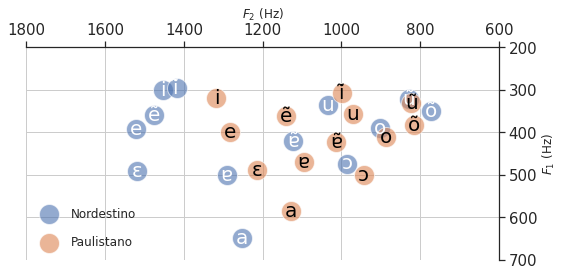

In [32]:
fig, ax = plt.subplots()
vowel_scatter(ax, nordestino_vowels, label="Nordestino", c="white")
vowel_scatter(ax, paulistano_vowels, label="Paulistano", c="black")
configure_plot(ax)
plt.savefig("../imgs/vowels-nordxpaul.pdf", dpi=300)

In [33]:
plt.scatter(
    nrd_paul["meanf0"],
    nrd_paul["length"],
    s=80,
    edgecolors="#FFFFFF",
    alpha=0.6,
    c=["b" if l == "SP" else "r" for l in nrd_paul["state"]]
)

NameError: name 'nrd_paul' is not defined

## Testing for AI vs. Human captions

The ideais to test whether there is any **significant difference** between human and AI vowel mean dB extracted based on the captions. The null hypothesis is that **they come from different distributions**, in which case the vowels extracted from AI-captions would not be usefull.

First, lets take a look at the histograms for each vowel.

In [ ]:
sns.set_theme(style="whitegrid", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)}, context="paper")
fct = sns.catplot(
    data=youngs,
    kind="count",
    y="caption",
    hue="gender",
    aspect=3,
    height=3,
)

fct.set_axis_labels("Count", "")
# ax.set_xlabel("Count")
# ax.set_ylabel("Caption")
fct.set_yticklabels(["AI", "Human"])
fct.legend.set(title="Gender")
plt.savefig("../imgs/aihuman-count.pdf", dpi=300)

In [ ]:
youngs.groupby(["caption", "phoneme"]).count()

In [ ]:
210749-189281

#### Testing dB

In [ ]:
from scipy import stats
from sklearn import model_selection

sns.set_theme(style="ticks", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})
oralvowels = ["a", "e", "i", "o", "u", "ɐ", "ɔ", "ɛ"]
youngs_oral = youngs[(youngs["phoneme"].isin(oralvowels)) & (youngs["gender"] == "M")]

sns.displot(
    data=youngs,
    x="meanDB",
    col="phoneme",
    kind="kde",
    hue="caption",
    col_wrap=4,
    lw=3,
    aspect=2,
    height=3,
)

The distributions look very similar! To test our hypothesis, we could use a Kruskall-Wallis test. Its null hypothesis is that *the variables are generated from the same distribution*. Thus, if we fail the Kruskall-Wallis test we validated our hypothesis that **the variables are generated from te same distribution**.

In [ ]:
print("Shapiro-Wilk test for normality\n")


def shap_wilk(feat, caption, output=None):
    for p in youngs.phoneme.unique():
        youngs_hpt = youngs[(youngs.phoneme == p) & (youngs.caption == caption)]
        st, pval = stats.shapiro(youngs_hpt[feat])
        output_label = output + "\t" if output else ""
        print(f"{output_label}{p}: {pval:1.2e}")


shap_wilk("meanDB", "pt-BR", "Human")
shap_wilk("meanDB", "a.pt", "AI")

In [ ]:
print("Paired ttest for HUman vs. AI vowels\n")

def paired_ttest(feat, rstate=42):
    for p in youngs.phoneme.unique():
        _, Xtest = model_selection.train_test_split(
            youngs[(youngs.phoneme == p) & (youngs.caption == "a.pt")],
            test_size=len(youngs[(youngs.phoneme == p) & (youngs.caption == "pt-BR")].index),
            random_state=rstate,
            stratify=youngs[(youngs.phoneme == p) & (youngs.caption == "a.pt")]["gender"],
        )
        youngs_p = youngs[youngs.phoneme == p]
        st, pval = stats.ttest_rel(
            youngs_p[youngs_p.caption == "pt-BR"][feat],
            Xtest[feat],
        )
        if pval < 0.05:
            print(f"Found significant difference for phoneme ", end="")
        else:
            print(f"No significant difference for phoneme ", end="")
        print(f"\\{p}\\: {pval:1.4f}")
        

paired_ttest("meanDB")

In [ ]:
from scipy import stats
print("Kruskall-Wallis test for dB between Human and AI\n")

def kruskalwallis(feat):
    for vowel in youngs.phoneme.unique():
        youngs_p = youngs[(youngs.phoneme == vowel)]
        hstat, pval = stats.kruskal(
            youngs_p[youngs_p.caption == "pt-BR"][feat].values,
            youngs_p[youngs_p.caption == "a.pt"][feat].values,
        )

        if pval < 0.05:
            print(f"{vowel} -- There are significant differences in the means!", end="")
        else:
            print(f"{vowel} -- The means have no difference!", end="")
        print(f" p = {pval:1.4f}")
        
kruskalwallis("meanDB")

We found some differences between vowels regarding their volume in dB. Now, lets see what we can find for other features.

#### Tests for Mean $F_0$

In [ ]:
sns.displot(
    data=youngs,
    x="meanf0",
    col="phoneme",
    kind="kde",
    hue="caption",
    col_wrap=4,
    lw=3,
    aspect=2,
    height=3,
)

Distributions are skewed to the left, but are also similar. Lets test for their normality and then apply a KW test

In [ ]:
print("Shapiro-Wilk test for normality in F0\n")

shap_wilk("meanf0", "pt-BR", "Human")
shap_wilk("meanf0", "a.pt", "AI")

All vowels, from AI and Human, pass on the normality test.

In [ ]:
print("Paired ttest for Human vs. AI vowels F0\n")

paired_ttest("meanf0")

In [ ]:
print("Kruskall-Wallis test for F0 between Human and AI\n")

kruskalwallis("meanf0")

Except for /ĩ/, all vowels have a signifficant difference in the distributions for the F0 between AI and Human. Now, its time for the first formant.

#### Tests for $F_1$

In [ ]:
sns.displot(
    data=youngs,
    x="f1",
    col="phoneme",
    kind="kde",
    hue="caption",
    col_wrap=4,
    lw=3,
    aspect=2,
    height=3,
)

In [ ]:
print("Shapiro-Wilk test for normality in F0\n")

shap_wilk("f1", "pt-BR", "Human")
shap_wilk("f1", "a.pt", "AI")

In [ ]:
print("Paired ttest for Human vs. AI vowels F1\n")

paired_ttest("f1")

In [ ]:
print("Kruskall-Wallis test for F1 between Human and AI\n")

kruskalwallis("f1")

#### $F_2$

In [ ]:
sns.displot(
    data=youngs,
    x="f2",
    col="phoneme",
    kind="kde",
    hue="caption",
    col_wrap=4,
    lw=3,
    aspect=2,
    height=3,
)

In [ ]:
print("Shapiro-Wilk test for F2 between Human and AI\n")

shap_wilk("f2", "pt-BR", "Human")
shap_wilk("f2", "a.pt", "AI")

In [ ]:
paired_ttest("f2")

In [ ]:
kruskalwallis("f2")

### Length tests

In [ ]:
sns.displot(
    data=youngs,
    x="length",
    col="phoneme",
    kind="kde",
    hue="caption",
    col_wrap=4,
    lw=3,
    aspect=2,
    height=3,
)

In [ ]:
print("Shapiro-Wilk test for LENGTH between Human and AI\n")

shap_wilk("length", "pt-BR", "Human")
shap_wilk("length", "a.pt", "AI")

In [ ]:
paired_ttest("length")

In [ ]:
kruskalwallis("length")

## Accent comparison

In [ ]:
youngs.groupby(["phoneme", "gender"])["meanDB"].count()

In [ ]:
sns.set_theme(style="ticks", palette="deep", rc={"ytick.labelsize": 15, "xtick.labelsize": 15, "figure.figsize": (8, 4)})

nrd_paul = pd.concat((nrddata, paulistano), ignore_index=True, sort=False)
fct = sns.displot(
    data=nrd_paul,
    x="meanDB",
    y="age",
    kind="kde",
    col="state",
    fill=True,
    # aspect=4,
    # notch=True,
)
fct.despine()
fct.set_axis_labels("Volume (dB)", "Age")

In [ ]:
sns.set_theme(style="ticks", palette="deep", rc={"ytick.labelsize": 17, "xtick.labelsize": 17, "figure.figsize": (8, 4)})
fig, axs = plt.subplots(ncols=2, figsize=(14, 4), sharey=True)
# axs[0].set_ylim((0, 0.002))
# axs[0].set_xlim((0, 3000))
axs[0].grid(axis="y")
axs[0].set_xlabel("$F_1$ (Hz)")

axs[1].grid(axis="y")
# axs[1].set_xlim((0, 3000))
# axs[1].set_ylim((0, 0.002))
axs[1].set_xlabel("$F_2$ (Hz)")

sns.kdeplot(
    data=nrd_paul,
    x="f1",
    hue="state",
    fill=True,
    ax=axs[0],
    legend=False,
    lw=2,
)
sns.kdeplot(
    data=nrd_paul,
    x="f2",
    hue="state",
    fill=True,
    ax=axs[1],
    lw=2,
)

leg = axs[1].get_legend()
leg.set(title="Accent", bbox_to_anchor=(1.2, .7))
leg.draw_frame(False)
fig.tight_layout()
plt.savefig("../imgs/formants-accents.pdf", dpi=300)

In [ ]:
from scipy import stats

res = stats.bootstrap(
    data=(nrddata["f1"].values,),
    statistic=np.median,
    n_resamples=5000,
    random_state=42,
)

print(res)

In [ ]:
print(paulistano["f1"].median())

In [ ]:
res = stats.bootstrap(
    data=(nrddata["f2"].values,),
    statistic=np.median,
    n_resamples=5000,
    random_state=42,
)

print(res)
print(paulistano["f2"].median())

In [ ]:
res = stats.bootstrap(
    data=(nrddata["meanDB"].values,),
    statistic=np.median,
    n_resamples=5000,
    random_state=42,
)

print(res)
print(paulistano["meanDB"].median())

In [ ]:
sns.displot(
    data=nrd_paul,
    x="length",
    hue="state",
    kind="kde",
    lw=2,
    fill=True,
    aspect=2,
)

In [ ]:
sns.displot(
    data=nrd_paul,
    x="meanDB",
    hue="state",
    kind="kde",
    lw=2,
    fill=True,
    aspect=2,
)

In [ ]:
res = stats.bootstrap(
    data=(nrddata["length"].values,),
    statistic=np.median,
    n_resamples=5000,
    random_state=42,
)

print(res)
print(paulistano["length"].median())

In [ ]:
nrddata.groupby("speaker").mean()

In [ ]:
nrddata["length"].describe()

In [ ]:
vowels = nrddata["phoneme"].unique()
print(vowels)

In [ ]:
paulvowels = paulistano["phoneme"].unique()
print(paulvowels)

In [ ]:
for feat in ["length", "meanf0", "f1", "f2", "meanDB"]:
    print()
    print(f"{25 * '#'} {feat.upper()} {25 * '#'}")
    print()
    for vowel in vowels:
        nrdvowel = nrddata[nrddata["phoneme"] == vowel]
        res = stats.bootstrap(
            data=(nrdvowel[feat].values,),
            statistic=np.median,
            n_resamples=5000,
            random_state=42,
            method="basic",
        )

        paulvowel = paulistano[paulistano["phoneme"] == vowel]
        med = paulvowel[feat].median()
        print(f"{vowel} || ({res.confidence_interval[0]:1.2f} to {res.confidence_interval[1]:1.2f}) +- {res.standard_error:1.2f} || Mdn. {med}", end="")
        if(med < res.confidence_interval[0] or med > res.confidence_interval[1]):
            print(" *** ")
        else:
            print()

## Clustering Accents

Here, we want to cluster the accents without prior information on how many there are. First, the clustering is performed using the vowels only, with their acoustics.
Specifically, we choose vowels that are very similar between Nordestino and Paulistano: o, ũ, õ, and ɔ

Initially, it is necessary to reshape the data. Since data was extracted with phonemes in mind, applying clustering into this 
data may lead the model to fitthe phonemes, rather than accents. Therefore, the data is reshaped so that each row represents a
speaker median for meanf0, length, meanDB, f1, and f2 for each vowel.

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [ ]:
similar_phones = nrd_paul[nrd_paul["phoneme"].isin(["o", "õ", "ũ", "ɔ"])]
similar_phones

In [ ]:
Xphon = similar_phones[similar_phones["phoneme"].isin(["o", "õ", "ũ", "ɔ"])]
X = Xphon.drop(["age"], axis=1).groupby(["speaker", "phoneme"]).median()
Xt = X.T.stack().T
Xt.head()

Now, we need to generate the expected labels which are the accents

In [ ]:
Y = Xphon.drop(["age"], axis=1).groupby(["speaker", "state"]).median()
Y = Y.index.get_level_values(level=1)
Y

Then, standardize thee values and make the vector C-like

In [ ]:
X = StandardScaler().fit_transform(Xt)
X = X.copy(order='C')

Finally, we split the data with 5-Fold and cross validate the settings with a hyper-parameter grid.

In [ ]:
NFOLD = 5

hparamgrid = {"branching_factor": [50, 150, 250], "threshold": [0.25, 0.5, 0.75, 1.5], "n_clusters": [2, 4, 8, 16]}
paramgrid = model_selection.ParameterGrid(hparamgrid)
kfold = model_selection.KFold(n_splits=NFOLD, shuffle=True, random_state=42)
eval_metrics = {
    "rand": metrics.rand_score,  # 1 is perfect
    "mis": metrics.mutual_info_score, # upper to 1
    "homo": metrics.homogeneity_score, # 1 is perfect
}

results = []
for pgrid in paramgrid:
    clf = Birch(**pgrid)

    for train_idx, test_idx in kfold.split(X):
        Xtrain, Ytrain = X[train_idx], Y[train_idx]
        Xtest, Ytest = X[test_idx], Y[test_idx]
        clf.fit(Xtrain, Ytrain)
        
        ypred = clf.predict(Xtest)
        
        for met, call in eval_metrics.items():
            rs = call(Ytest, ypred)
            results.append(dict(pgrid, **{"met": met, "result": rs}))


results_df = pd.DataFrame(results)
results_descr = results_df.groupby(["n_clusters", "branching_factor", "threshold", "met"]).describe()
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(results_descr)

In [ ]:
results_path = pathlib.PosixPath("~/Dev/ACParams/").expanduser()
results_descr.to_csv(results_path / "dbscan-accent-results.csv")

In [ ]:
results_descr

In [ ]:
NFOLD = 5

hparamgrid = {"covariance_type": ["full", "tied", "diag", "spherical"], "max_iter": [100, 300, 500], "n_components": [2, 4, 8, 16]}
paramgrid = model_selection.ParameterGrid(hparamgrid)
kfold = model_selection.KFold(n_splits=NFOLD, shuffle=True, random_state=42)
eval_metrics = {
    "rand": metrics.rand_score,  # 1 is perfect
    "mis": metrics.mutual_info_score, # upper to 1
    "homo": metrics.homogeneity_score, # 1 is perfect
}

results = []
for pgrid in paramgrid:
    clf = GaussianMixture(random_state=42, **pgrid)

    for train_idx, test_idx in kfold.split(X):
        Xtrain, Ytrain = X[train_idx], Y[train_idx]
        Xtest, Ytest = X[test_idx], Y[test_idx]
        clf.fit(Xtrain, Ytrain)
        
        ypred = clf.predict(Xtest)
        
        for met, call in eval_metrics.items():
            rs = call(Ytest, ypred)
            results.append(dict(pgrid, **{"met": met, "result": rs}))


results_df = pd.DataFrame(results)
gmm_results = results_df.groupby(["n_components", "covariance_type", "max_iter", "met"]).describe()

In [ ]:
gmm_results.to_csv(results_path / "gmm-accent-results.csv")
gmm_results